Name of the student : SHIVAM RAVI 

Project Title: Automate extraction of handwritten text from an image 

Name of the Organization: TCS iON

Name of the Industry Mentor: Debashis Roy

Name of the Institute: Nitte Mahalinga Adyanthaya Memorial Institute of Technology




Importing the libraries

In [8]:
import os
import fnmatch
import cv2
import numpy as np
import string
import time
import numpy as np
import os
import glob

from random import *
from PIL import Image

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import Sequential
from keras.layers.convolutional import Cropping2D,ZeroPadding2D
print("all modules are imported")

all modules are imported


In [6]:
d={}
from subprocess import check_output
with open("C:/Users/SHIVAM RAVI/Desktop/project/small_forms.txt") as f:
  for line in f:
    key=line.split(' ')[0]
    writer=line.split(' ')[1]
    print(key , ' :: ', writer)
    d[key]=writer
print(len(d.keys()))

a01-000u  ::  000
a01-000x  ::  001
a01-003  ::  002
a01-003u  ::  000
a01-003x  ::  003
a01-007  ::  004
a01-007u  ::  000
a01-007x  ::  003
a01-011  ::  005
a01-011u  ::  000
a01-011x  ::  006
a01-014  ::  007
a01-014u  ::  000
a01-014x  ::  008
a01-020  ::  009
a01-020u  ::  000
a01-020x  ::  010
a01-026  ::  009
a01-026u  ::  000
a01-026x  ::  008
a01-030  ::  005
a01-030u  ::  000
a01-030x  ::  010
a01-038  ::  007
a01-038x  ::  011
a01-043  ::  012
a01-043u  ::  000
a01-043x  ::  011
a01-049  ::  012
a01-049u  ::  000
a01-049x  ::  000
a01-053  ::  013
a01-053u  ::  000
a01-053x  ::  014
a01-058  ::  013
a01-058u  ::  000
a01-058x  ::  014
a01-063  ::  013
a01-063u  ::  000
a01-063x  ::  015
a01-068u  ::  000
a01-072u  ::  000
a01-072x  ::  001
a01-077  ::  016
a01-077u  ::  000
a01-082u  ::  000
a01-087  ::  017
a01-087u  ::  000
a01-091  ::  016
a01-091u  ::  000
a01-096u  ::  000
a01-102  ::  016
a01-102u  ::  000
a01-107  ::  018
a01-107u  ::  000
a01-113  ::  018
a01-113u  :

In [9]:
temp=[]
target_list=[]
tempDict={}
tempDict=d.copy()


path_to_files=os.path.join('C:/Users/SHIVAM RAVI/Desktop/project/small_S','*')
for filename in sorted(glob.glob(path_to_files)):
  temp.append(filename)
  image_name=filename.split('/')[-1]
  file,ext=os.path.splitext(image_name)
  parts=file.split('-')
  form=parts[0] + '-' + parts[1]
  tempDict=d.copy()
  val=tempDict
  if val:
    target_list.append(str(val))
img_files=np.asarray(temp)
img_targets=np.asarray(target_list)
print(img_files.shape)
print(img_targets.shape)

(358,)
(358,)


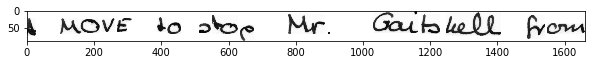

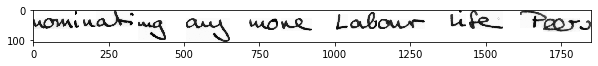

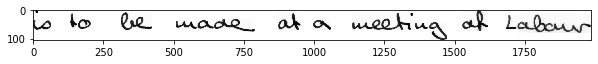

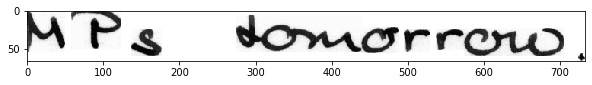

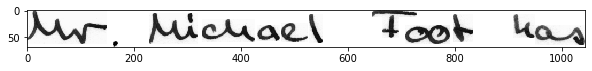

In [10]:
for filename in img_files[:5]:
  img=mpimg.imread(filename)
  plt.figure(figsize=(10,10))
  plt.imshow(img,cmap='gray')

In [11]:
encoder=LabelEncoder()
encoder.fit(img_targets)
encoded_y=encoder.transform(img_targets)
print(img_files[:10],img_targets[:10],encoded_y[:10])

['C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s00-00.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s00-01.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s00-02.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s00-03.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s01-00.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s01-01.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s01-02.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000u-s01-03.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000x-s00-00.png'
 'C:/Users/SHIVAM RAVI/Desktop/project/small_S\\a01-000x-s00-01.png'] ["{'a01-000u': '000', 'a01-000x': '001', 'a01-003': '002', 'a01-003u': '000', 'a01-003x': '003', 'a01-007': '004', 'a01-007u': '000', 'a01-007x': '003', 'a01-011': '005', 'a01-011u': '000', 'a01-011x': '006', 'a01-014': '007', 'a01-014u': '000', 'a01-014x': '008', 'a01-020': '009', 'a01-020u': '000', 'a01-02

In [4]:
# char_list:   'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# total number of our output classes: len(char_list)
char_list = string.ascii_letters+string.digits
 
def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst

In [5]:
 
# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
 
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []
 
max_label_len = 0
 
i =1 
flag = 0
path = 'mjsynth.tar/mnt/ramdisk/max/90kDICT32px'
for root, dirnames, filenames in os.walk(path):
 
    for f_name in fnmatch.filter(filenames, '*.jpg'):
        # read input image and convert into gray scale image
        img = cv2.cvtColor(cv2.imread(os.path.join(root, f_name)), cv2.COLOR_BGR2GRAY)   
 
        # convert each image of shape (32, 128, 1)
        w, h = img.shape
        if h > 128 or w > 32:
            continue
        if w < 32:
            add_zeros = np.ones((32-w, h))*255
            img = np.concatenate((img, add_zeros))
 
        if h < 128:
            add_zeros = np.ones((32, 128-h))*255
            img = np.concatenate((img, add_zeros), axis=1)
        img = np.expand_dims(img , axis = 2)
        
        # Normalize each image
        img = img/255.
        
        # get the text from the image
        txt = f_name.split('_')[1]
        
        # compute maximum length of the text
        if len(txt) > max_label_len:
            max_label_len = len(txt)
            
           
        # split the 150000 data into validation and training dataset as 10% and 90% respectively
        if i%10 == 0:     
            valid_orig_txt.append(txt)   
            valid_label_length.append(len(txt))
            valid_input_length.append(31)
            valid_img.append(img)
            valid_txt.append(encode_to_labels(txt))
        else:
            orig_txt.append(txt)   
            train_label_length.append(len(txt))
            train_input_length.append(31)
            training_img.append(img)
            training_txt.append(encode_to_labels(txt)) 
        
        # break the loop if total data is 150000
        if i == 150000:
            flag = 1
            break
        i+=1
    if flag == 1:
        break

In [6]:
# pad each output label to maximum text length
 
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = len(char_list))
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = len(char_list))

In [7]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(32,128,1))
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [8]:
act_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 128, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 128, 64)       640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 32, 128)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 32, 256)        295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 32, 256)        590080    
__________

### Loss Function

In [9]:
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
 
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
 
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
 
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

### training the Model

In [10]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')
 
filepath="best_model.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [11]:
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)
train_label_length = np.array(train_label_length)

valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length)
valid_label_length = np.array(valid_label_length)

In [12]:
batch_size = 256
epochs = 10
model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], y=np.zeros(len(training_img)), batch_size=batch_size, epochs = epochs, validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]), verbose = 1, callbacks = callbacks_list)

Train on 135000 samples, validate on 15000 samples
Epoch 1/10
135000/135000 [==============================] - 586s 4ms/step - loss: 27.5512 - val_loss: 26.9004

Epoch 00001: val_loss improved from inf to 26.90039, saving model to best_model.hdf5
Epoch 2/10
135000/135000 [==============================] - 612s 5ms/step - loss: 26.1934 - val_loss: 26.9729

Epoch 00002: val_loss did not improve from 26.90039
Epoch 3/10
135000/135000 [==============================] - 619s 5ms/step - loss: 21.8621 - val_loss: 21.6336

Epoch 00003: val_loss improved from 26.90039 to 21.63363, saving model to best_model.hdf5
Epoch 4/10
135000/135000 [==============================] - 610s 5ms/step - loss: 8.3180 - val_loss: 5.4096

Epoch 00004: val_loss improved from 21.63363 to 5.40958, saving model to best_model.hdf5
Epoch 5/10
135000/135000 [==============================] - 640s 5ms/step - loss: 4.3365 - val_loss: 3.9244

Epoch 00005: val_loss improved from 5.40958 to 3.92440, saving model to best_model

### Testing the Model

In [13]:
# load the saved best model weights
act_model.load_weights('best_model.hdf5')
 
# predict outputs on validation images
prediction = act_model.predict(valid_img[:10])
 
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
 
# see the results
i = 0
for x in out:
    print("original_text =  ", valid_orig_txt[i])
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
    i+=1

original_text =   Expend
predicted text = Expend

original_text =   RAKE
predicted text = RAKE

original_text =   IMAM
predicted text = MAM

original_text =   kraft
predicted text = kralt

original_text =   deceleration
predicted text = deceleration

original_text =   FOXHUNTING
predicted text = Foxhunting

original_text =   Renaud
predicted text = Renaud

original_text =   Trenchant
predicted text = Trenchant

original_text =   HOD
predicted text = HOD

original_text =   sculpt
predicted text = sculpt

